In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
#ML library
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
# importing machine learning models for prediction xboost in ensembleing
import xgboost as xgb
# importing bagging module
from sklearn.ensemble import BaggingRegressor

In [4]:

from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

In [5]:
#1.Collecting the data
from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Covid19/CovidCaseDetails_ensemble.csv')

data.head( )

Mounted at /content/drive


,id,government_id,symptom_id,blood_pressure,blood_pressure_range,oxygen_level,oxygen_level_range,body_temp,body_temp_range,symptoms,other_diseases,diagnosed_date,age,gender,current_status,status,status_change_date,travel_details
0,0,1001,102,140,90-140,78,70-80,99.0,99-101.9,H,Cholestrol,30-01-2020,20,F,R,P,14-02-2020,Travelled from Wuhan
1,1,1002,104,120,80-120,79,70-80,93.0,93-94.9,L,None,2/2/2020,21,M,R,P,14-02-2020,Travelled from Wuhan
2,2,1003,104,125,90-140,75,70-80,93.5,93-94.9,L,sugar,3/2/2020,22,F,R,P,14-02-2020,Travelled from Wuhan
3,3,1004,102,130,90-140,80,80-90,99.0,99-101.9,H,None,2/3/2020,45,M,R,P,15-03-2020,"Travelled from Austria, Italy"
4,4,1005,104,140,90-140,80,80-90,93.0,93-94.9,L,skinproblem,2/3/2020,24,M,R,P,2/3/2020,"Travelled from Austria, Italy"


In [14]:
print('DataSet Size in Bytes:  ',data.size)

DataSet Size in Bytes:   48618


In [6]:
#2.DataWranglinig - preprocesssing

In [15]:
print('DataSet Records and columns ')
data.shape

DataSet Records and columns 


(2701, 18)

In [17]:
print('Number of Independent Columns :')
print('id,government_id,symptom_id,blood_pressure,oxygen_level,body_temp,age,gender,travel_details ')

print('Number of dependent Columns :')
print('symptoms,other_diseases,diagnosed_date,current_status,status,status_change_date')

Number of Independent Columns :
id,government_id,symptom_id,blood_pressure,oxygen_level,body_temp,age,gender,travel_details 
Number of dependent Columns :
symptoms,other_diseases,diagnosed_date,current_status,status,status_change_date


In [22]:
print('Displaying the missing values(empty) in DataSet')
print(data.isnull().sum())

Displaying the missing values(empty) in DataSet
id                      0
government_id           0
symptom_id              0
blood_pressure          0
blood_pressure_range    0
oxygen_level            0
oxygen_level_range      0
body_temp               0
body_temp_range         0
symptoms                0
other_diseases          0
diagnosed_date          0
age                     0
gender                  0
current_status          0
status                  0
status_change_date      0
travel_details          4
dtype: int64


In [25]:
#---MAking the Missing values to 0
data.travel_details = data.travel_details.fillna("unknown")
print(data.isnull().sum())

id                      0
government_id           0
symptom_id              0
blood_pressure          0
blood_pressure_range    0
oxygen_level            0
oxygen_level_range      0
body_temp               0
body_temp_range         0
symptoms                0
other_diseases          0
diagnosed_date          0
age                     0
gender                  0
current_status          0
status                  0
status_change_date      0
travel_details          0
dtype: int64


In [18]:

data.head()

,id,government_id,symptom_id,blood_pressure,blood_pressure_range,oxygen_level,oxygen_level_range,body_temp,body_temp_range,symptoms,other_diseases,diagnosed_date,age,gender,current_status,status,status_change_date,travel_details
0,0,1001,102,140,90-140,78,70-80,99.0,99-101.9,H,Cholestrol,30-01-2020,20,F,R,P,14-02-2020,Travelled from Wuhan
1,1,1002,104,120,80-120,79,70-80,93.0,93-94.9,L,None,2/2/2020,21,M,R,P,14-02-2020,Travelled from Wuhan
2,2,1003,104,125,90-140,75,70-80,93.5,93-94.9,L,sugar,3/2/2020,22,F,R,P,14-02-2020,Travelled from Wuhan
3,3,1004,102,130,90-140,80,80-90,99.0,99-101.9,H,None,2/3/2020,45,M,R,P,15-03-2020,"Travelled from Austria, Italy"
4,4,1005,104,140,90-140,80,80-90,93.0,93-94.9,L,skinproblem,2/3/2020,24,M,R,P,2/3/2020,"Travelled from Austria, Italy"


In [26]:
#----Id Attributes is not used for the prediction and for further training of machine learning algorithm..it will be dropped
data.drop('id',axis=1,inplace=True)
data.head()

,government_id,symptom_id,blood_pressure,blood_pressure_range,oxygen_level,oxygen_level_range,body_temp,body_temp_range,symptoms,other_diseases,diagnosed_date,age,gender,current_status,status,status_change_date,travel_details
0,1001,102,140,90-140,78,70-80,99.0,99-101.9,H,Cholestrol,30-01-2020,20,F,R,P,14-02-2020,Travelled from Wuhan
1,1002,104,120,80-120,79,70-80,93.0,93-94.9,L,None,2/2/2020,21,M,R,P,14-02-2020,Travelled from Wuhan
2,1003,104,125,90-140,75,70-80,93.5,93-94.9,L,sugar,3/2/2020,22,F,R,P,14-02-2020,Travelled from Wuhan
3,1004,102,130,90-140,80,80-90,99.0,99-101.9,H,None,2/3/2020,45,M,R,P,15-03-2020,"Travelled from Austria, Italy"
4,1005,104,140,90-140,80,80-90,93.0,93-94.9,L,skinproblem,2/3/2020,24,M,R,P,2/3/2020,"Travelled from Austria, Italy"


In [27]:
#----'diagnosed_date','status_change_date' Attributes is not used for the prediction and for further training of machine learning algorithm..it will be dropped
data.drop(['diagnosed_date','status_change_date'],axis=1,inplace=True)
data.head()

,government_id,symptom_id,blood_pressure,blood_pressure_range,oxygen_level,oxygen_level_range,body_temp,body_temp_range,symptoms,other_diseases,age,gender,current_status,status,travel_details
0,1001,102,140,90-140,78,70-80,99.0,99-101.9,H,Cholestrol,20,F,R,P,Travelled from Wuhan
1,1002,104,120,80-120,79,70-80,93.0,93-94.9,L,None,21,M,R,P,Travelled from Wuhan
2,1003,104,125,90-140,75,70-80,93.5,93-94.9,L,sugar,22,F,R,P,Travelled from Wuhan
3,1004,102,130,90-140,80,80-90,99.0,99-101.9,H,None,45,M,R,P,"Travelled from Austria, Italy"
4,1005,104,140,90-140,80,80-90,93.0,93-94.9,L,skinproblem,24,M,R,P,"Travelled from Austria, Italy"


In [28]:
#----'travel_details' is not used for the prediction and for further training of machine learning algorithm..it will be dropped
data.drop(['travel_details'],axis=1,inplace=True)
data.head()

,government_id,symptom_id,blood_pressure,blood_pressure_range,oxygen_level,oxygen_level_range,body_temp,body_temp_range,symptoms,other_diseases,age,gender,current_status,status
0,1001,102,140,90-140,78,70-80,99.0,99-101.9,H,Cholestrol,20,F,R,P
1,1002,104,120,80-120,79,70-80,93.0,93-94.9,L,None,21,M,R,P
2,1003,104,125,90-140,75,70-80,93.5,93-94.9,L,sugar,22,F,R,P
3,1004,102,130,90-140,80,80-90,99.0,99-101.9,H,None,45,M,R,P
4,1005,104,140,90-140,80,80-90,93.0,93-94.9,L,skinproblem,24,M,R,P


In [30]:
#--After pre-processing new data
data.head()

,government_id,symptom_id,blood_pressure,blood_pressure_range,oxygen_level,oxygen_level_range,body_temp,body_temp_range,symptoms,other_diseases,age,gender,current_status,status
0,1001,102,140,90-140,78,70-80,99.0,99-101.9,H,Cholestrol,20,F,R,P
1,1002,104,120,80-120,79,70-80,93.0,93-94.9,L,None,21,M,R,P
2,1003,104,125,90-140,75,70-80,93.5,93-94.9,L,sugar,22,F,R,P
3,1004,102,130,90-140,80,80-90,99.0,99-101.9,H,None,45,M,R,P
4,1005,104,140,90-140,80,80-90,93.0,93-94.9,L,skinproblem,24,M,R,P


In [ ]:
#-------------DAta Exploration------------------------------------


In [38]:
# Check if any numerical columns are discrete
discrete_columns = [feature for feature in data.columns if len(data[feature].unique()) < 20 and feature not in ['status'] ]
print(f'Number of discrete Columns is {len(discrete_columns)}')
for i in discrete_columns:
    print(f'{i} has {len(data[i].unique())} discrete values')

data[discrete_columns].head()

Number of discrete Columns is 8
symptom_id has 5 discrete values
blood_pressure_range has 3 discrete values
oxygen_level_range has 8 discrete values
body_temp_range has 5 discrete values
symptoms has 5 discrete values
other_diseases has 10 discrete values
gender has 2 discrete values
current_status has 3 discrete values


,symptom_id,blood_pressure_range,oxygen_level_range,body_temp_range,symptoms,other_diseases,gender,current_status
0,102,90-140,70-80,99-101.9,H,Cholestrol,F,R
1,104,80-120,70-80,93-94.9,L,None,M,R
2,104,90-140,70-80,93-94.9,L,sugar,F,R
3,102,90-140,80-90,99-101.9,H,None,M,R
4,104,90-140,80-90,93-94.9,L,skinproblem,M,R


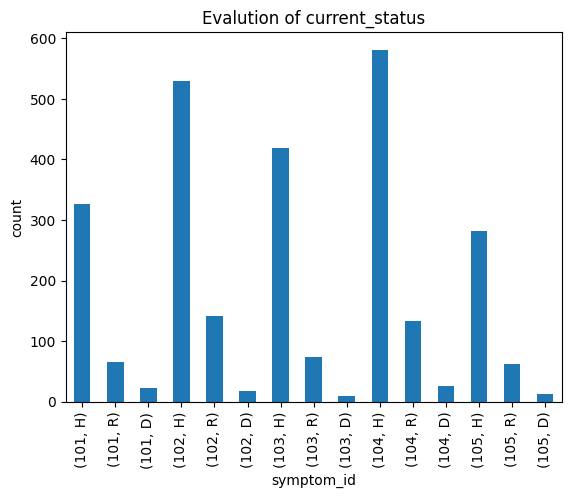

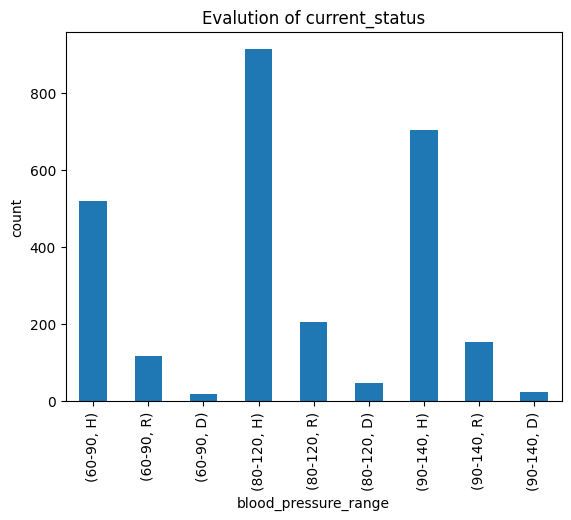

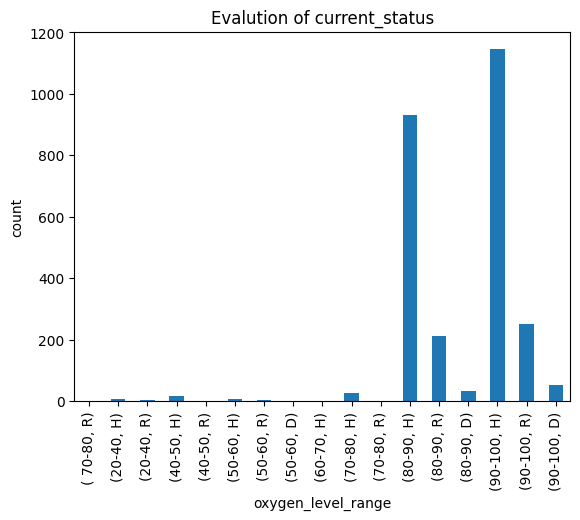

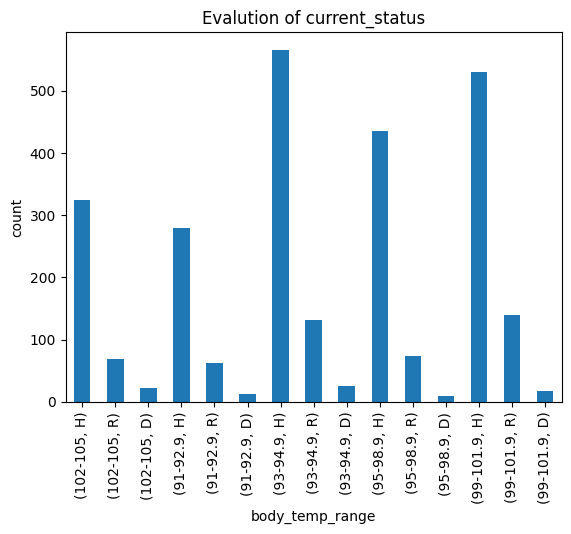

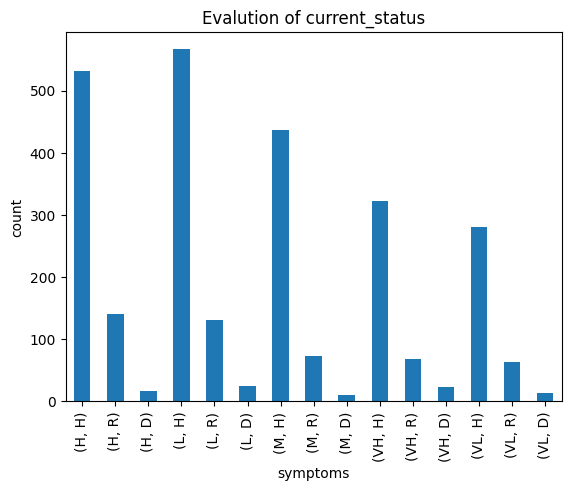

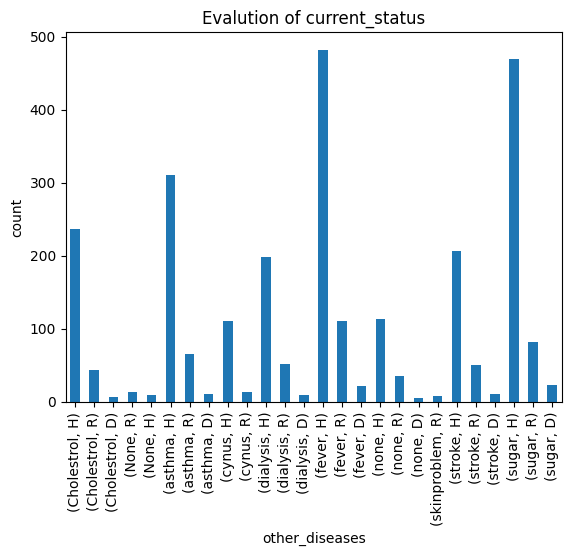

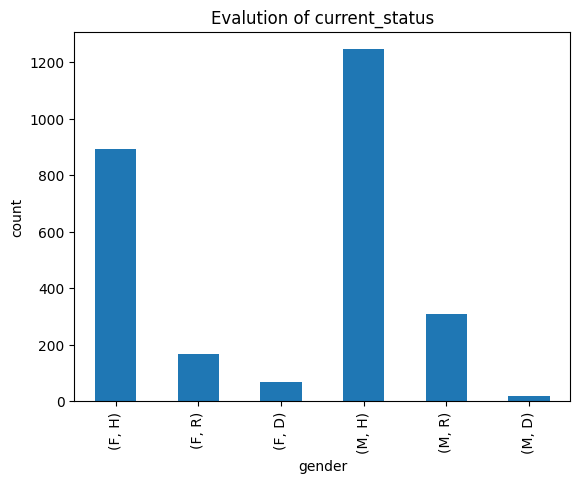

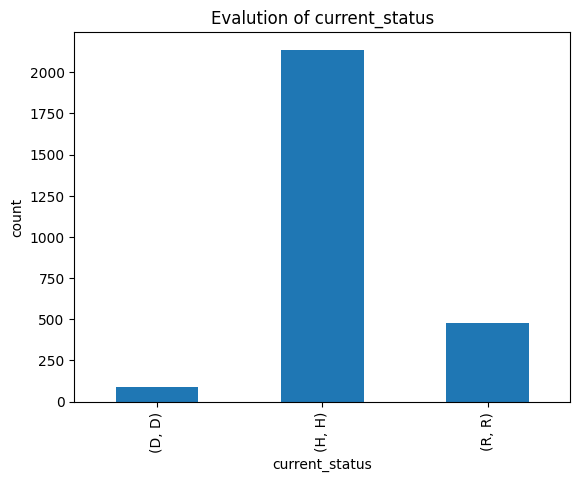

In [39]:

#Check distribution of the discrete data current_status
for feature in discrete_columns:
    dt=data.copy()
    dt.groupby(feature)['current_status'].value_counts().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.title('Evalution of current_status')
    plt.show()

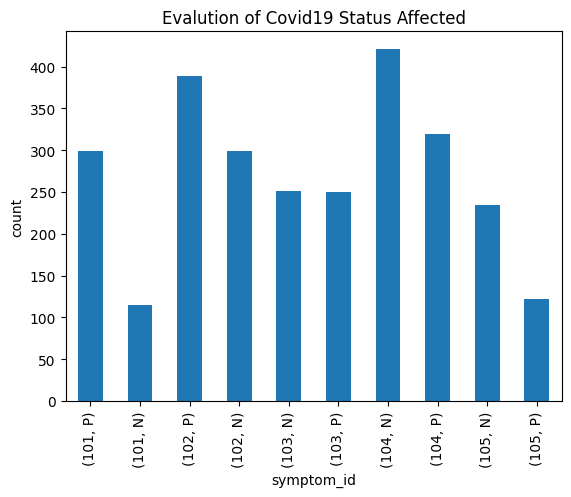

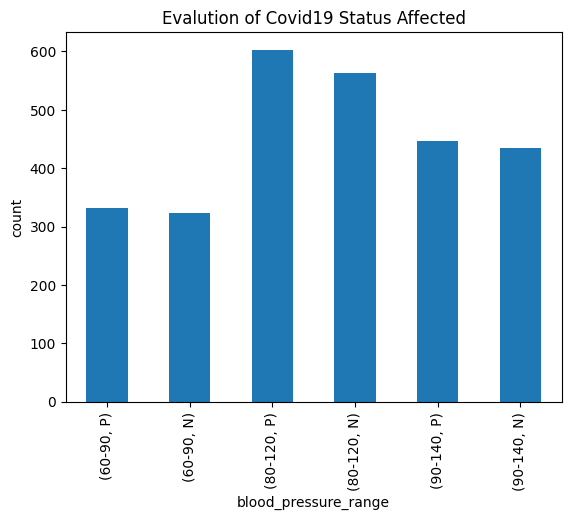

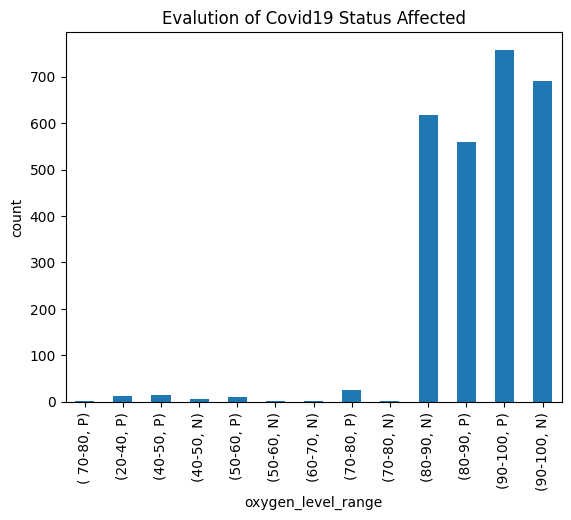

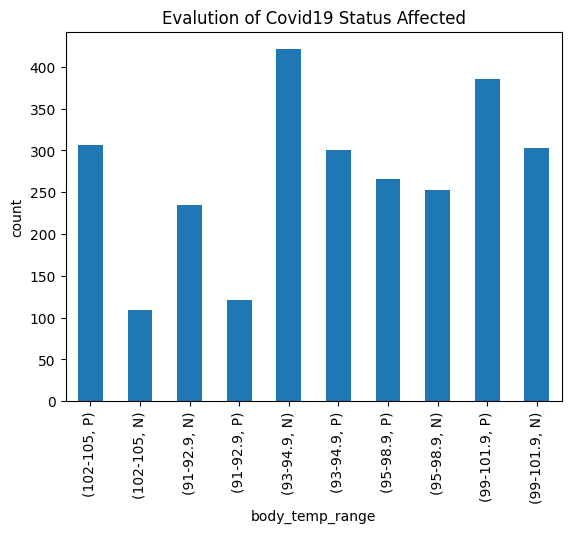

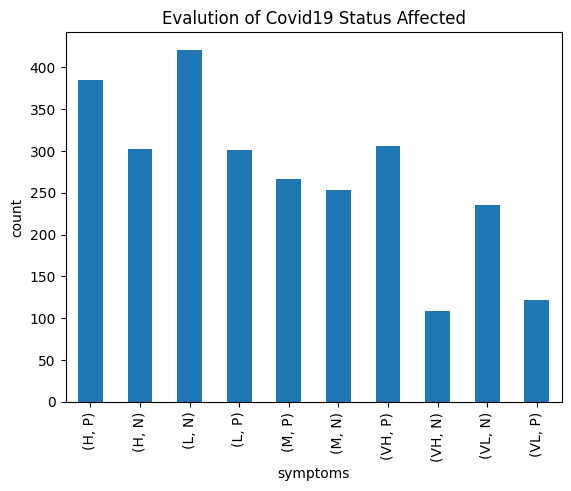

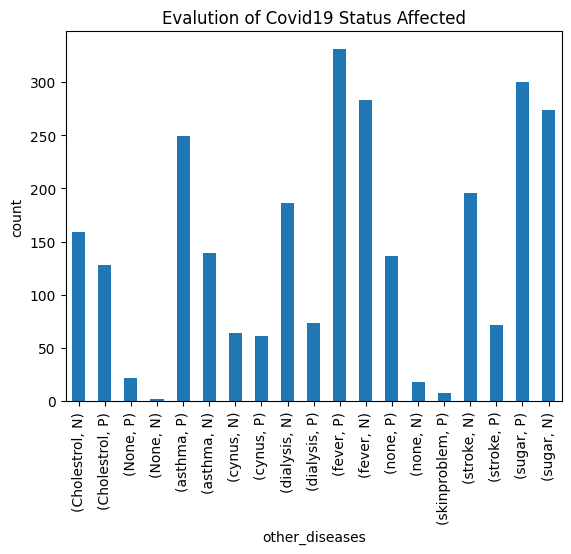

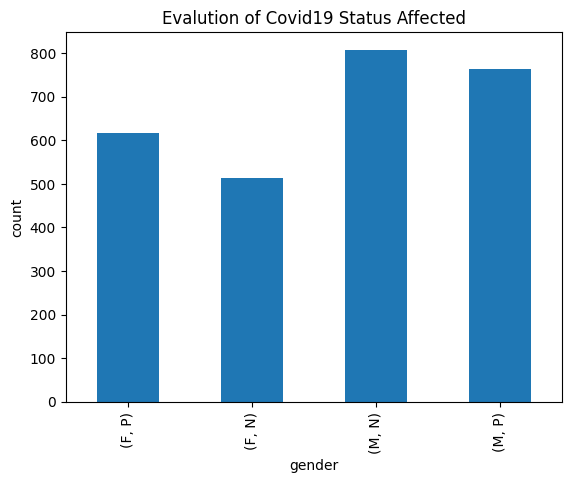

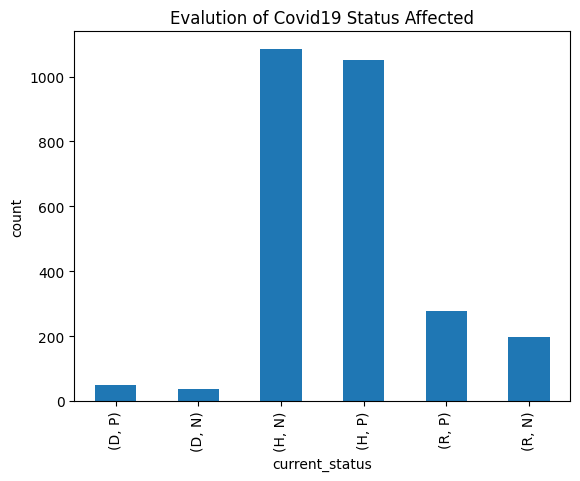

In [40]:

#Check distribution of the discrete data current_status
for feature in discrete_columns:
    dt=data.copy()
    dt.groupby(feature)['status'].value_counts().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.title('Evalution of Covid19 Status Affected')
    plt.show()

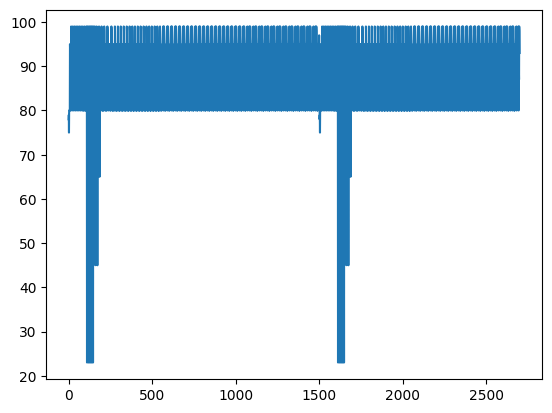

In [36]:
plt.plot(data['oxygen_level'])
plt.show()


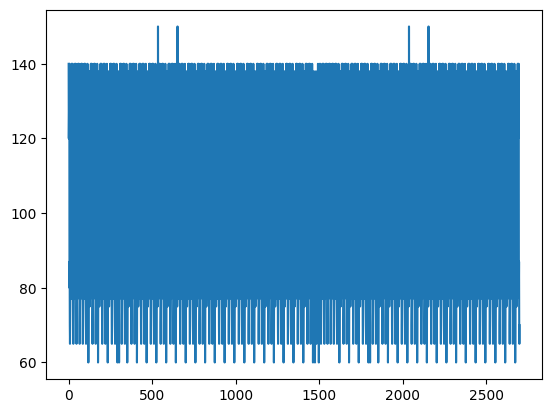

In [37]:
plt.plot(data['blood_pressure'])
plt.show()

<Axes: xlabel='status', ylabel='count'>

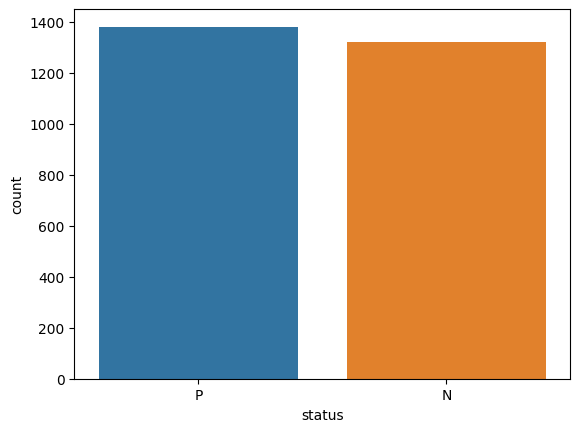

In [117]:
sns.countplot(data=data, x = 'status', label='Count')

<Axes: xlabel='current_status', ylabel='count'>

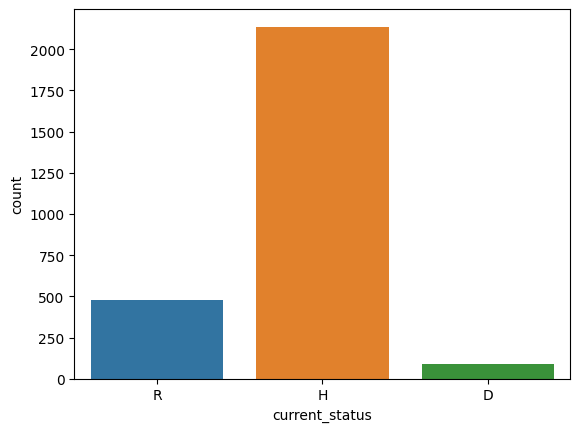

In [95]:
sns.countplot(data=data, x = 'current_status', label='Count')

<Axes: xlabel='symptoms', ylabel='count'>

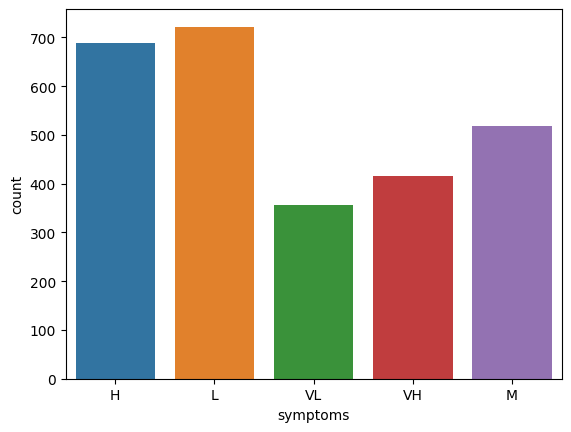

In [96]:
sns.countplot(data=data, x = 'symptoms', label='Count')

<Axes: xlabel='other_diseases', ylabel='count'>

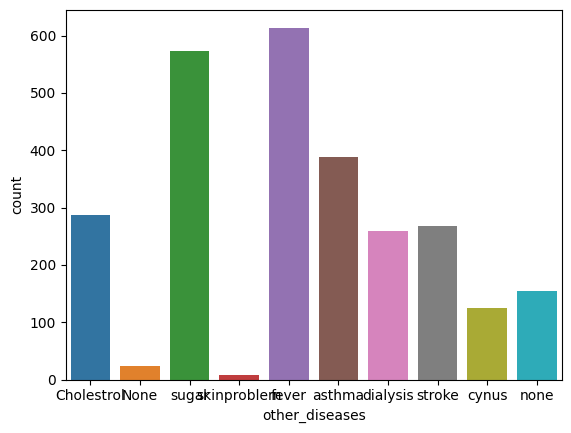

In [97]:
sns.countplot(data=data, x = 'other_diseases', label='Count')

<Axes: xlabel='oxygen_level', ylabel='count'>

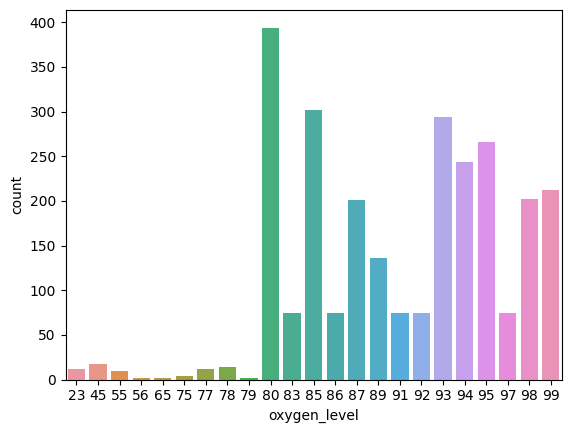

In [99]:
sns.countplot(data=data, x = 'oxygen_level', label='Count')

<Axes: xlabel='blood_pressure', ylabel='count'>

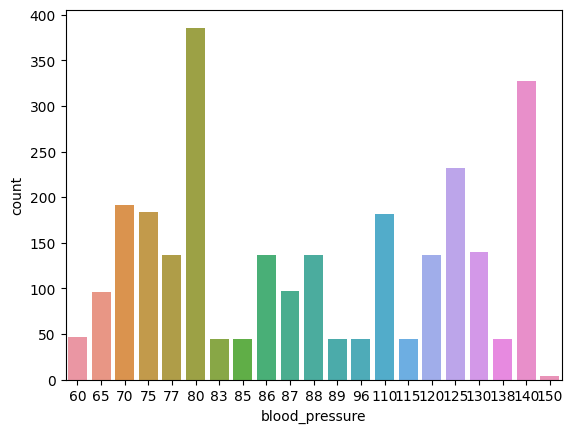

In [100]:
sns.countplot(data=data, x = 'blood_pressure', label='Count')

In [ ]:
#3.Analyze the data

In [56]:
train,test=train_test_split(data,test_size=0.3)
print(train.shape)
print(test.shape)

(1890, 14)
(811, 14)


In [ ]:
#relevant columns

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2701 entries, 0 to 2700
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   government_id         2701 non-null   int64  
 1   symptom_id            2701 non-null   int64  
 2   blood_pressure        2701 non-null   int64  
 3   blood_pressure_range  2701 non-null   object 
 4   oxygen_level          2701 non-null   int64  
 5   oxygen_level_range    2701 non-null   object 
 6   body_temp             2701 non-null   float64
 7   body_temp_range       2701 non-null   object 
 8   symptoms              2701 non-null   object 
 9   other_diseases        2701 non-null   object 
 10  age                   2701 non-null   int64  
 11  gender                2701 non-null   object 
 12  current_status        2701 non-null   object 
 13  status                2701 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 295.5+ KB


In [58]:
data.describe()

,government_id,symptom_id,blood_pressure,oxygen_level,body_temp,age
count,2701.000000,2701.000000,2701.000000,2701.000000,2701.000000,2701.000000
mean,2351.000000,102.977416,98.825250,89.243243,96.872973,44.658645
std,779.855863,1.292661,25.427701,8.837487,4.051061,19.665549
min,1001.000000,101.000000,60.000000,23.000000,91.000000,1.000000
25%,1676.000000,102.000000,80.000000,85.000000,93.000000,31.000000
50%,2351.000000,103.000000,87.000000,92.000000,97.600000,44.000000
75%,3026.000000,104.000000,125.000000,95.000000,99.600000,56.000000
max,3701.000000,105.000000,150.000000,99.000000,105.000000,99.000000


In [59]:
data.head()

,government_id,symptom_id,blood_pressure,blood_pressure_range,oxygen_level,oxygen_level_range,body_temp,body_temp_range,symptoms,other_diseases,age,gender,current_status,status
0,1001,102,140,90-140,78,70-80,99.0,99-101.9,H,Cholestrol,20,F,R,P
1,1002,104,120,80-120,79,70-80,93.0,93-94.9,L,None,21,M,R,P
2,1003,104,125,90-140,75,70-80,93.5,93-94.9,L,sugar,22,F,R,P
3,1004,102,130,90-140,80,80-90,99.0,99-101.9,H,None,45,M,R,P
4,1005,104,140,90-140,80,80-90,93.0,93-94.9,L,skinproblem,24,M,R,P


In [60]:
#prediction variables
prediction_var=['government_id','age','symptom_id','blood_pressure','oxygen_level','body_temp']

In [61]:
prediction_var

['government_id',
 'age',
 'symptom_id',
 'blood_pressure',
 'oxygen_level',
 'body_temp']

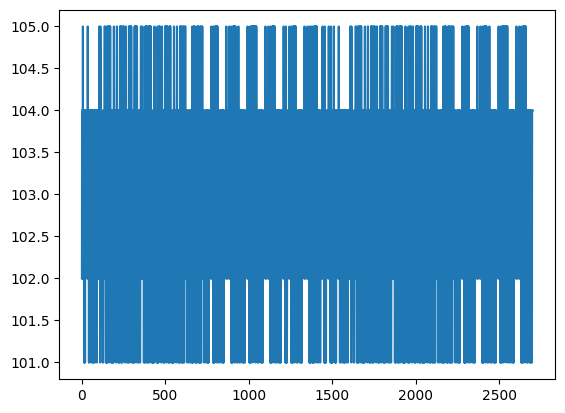

In [ ]:
plt.plot(data['symptom_id'])
plt.show()

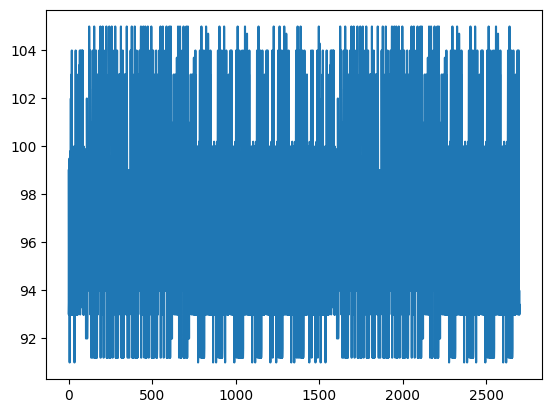

In [ ]:
plt.plot(data['body_temp'])
plt.show()

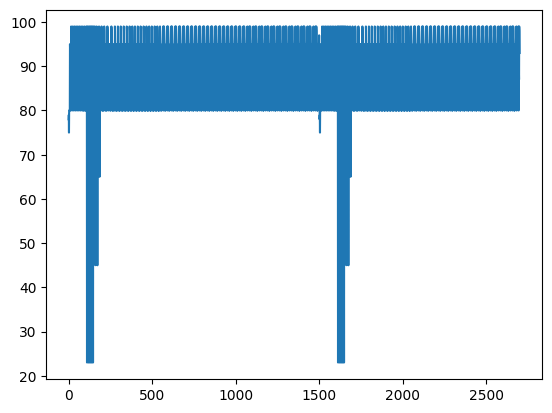

In [ ]:
plt.plot(data['oxygen_level'])
plt.show()

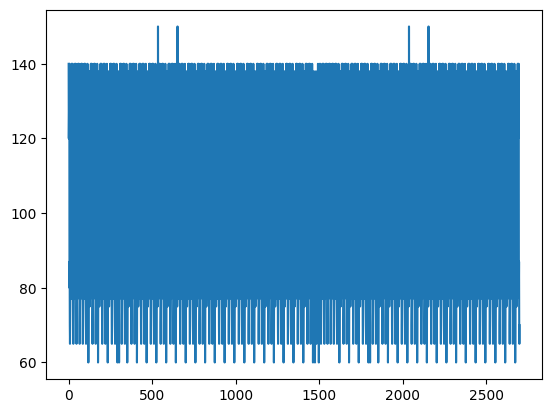

In [ ]:
plt.plot(data['blood_pressure'])
plt.show()

In [62]:
#---create ensemble moon split
coivd_data=data.size
X, y = make_moons(n_samples=coivd_data, noise=0.30)

In [63]:
#----Apply ensemble Voting 
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [112]:
log = LogisticRegression()
rnd = RandomForestClassifier(n_estimators=3)
GB = GaussianNB()

In [113]:
voting = VotingClassifier(
    estimators=[('logistics_regression', log), ('random_forest', rnd), ('GaussianNB', GB)],
    voting='hard')
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('logistics_regression', LogisticRegression()),
                             ('random_forest',
                              RandomForestClassifier(n_estimators=3)),
                             ('GaussianNB', GaussianNB())])

In [67]:
#TRAINING DATA
#input training data for Status
train_X=train[prediction_var]
#output training data
train_Y=train['status']

In [68]:
#input training data for Symptoms
train_X=train[prediction_var]
#output training data
train_Y1=train['symptoms']

In [69]:
#input training data for Currentstatus
train_X=train[prediction_var]
#output training data
train_Z=train['current_status']

In [70]:
#TESTING DATA
#same steps for testing data
#input testing data for Status
test_X=test[prediction_var]
#output testing data
test_Y=test['status']

In [71]:
#same steps for testing data
#input testing data for Symptoms
test_X=test[prediction_var]
#output testing data
test_Y1=test['symptoms']

In [72]:
#same steps for testing data Current status
#input testing data Current_Status
test_X=test[prediction_var]
#output testing data
test_Z=test['current_status']

In [73]:
#Training the model Status

logistic_model=LogisticRegression()
logistic_model.fit(train_X,train_Y)

LogisticRegression()

In [75]:
#Training the model for Current status

logistic_model_1=LogisticRegression()
logistic_model_1.fit(train_X,train_Z)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [76]:
#Training the model for Symptoms

logistic_model_2=LogisticRegression()
logistic_model_2.fit(train_X,train_Y1)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [77]:
#Testing the algorithm Status
predicted_value=logistic_model.predict(test_X)

In [78]:
#Testing the algorithm for Current status
predicted_value_1=logistic_model_1.predict(test_X)

In [80]:
#Testing the algorithm for Symptoms
predicted_value_2=logistic_model_2.predict(test_X)

In [79]:
# initializing the bagging model using XGboost as base model with default parameters
model = BaggingRegressor(base_estimator=xgb.XGBRegressor())

In [81]:
# training model
model.fit(train_X,train_X)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingRegressor(base_estimator=XGBRegressor(base_score=None, booster=None,
                                             callbacks=None,
                                             colsample_bylevel=None,
                                             colsample_bynode=None,
                                             colsample_bytree=None,
                                             early_stopping_rounds=None,
                                             enable_categorical=False,
                                             eval_metric=None,
                                             feature_types=None, gamma=None,
                                             gpu_id=None, grow_policy=None,
                                             importance_type=None,
                                             interaction_constraints=None,
                                             learning_rate=None, max_bin=None,
                                             max_cat_threshold=None,
                                             max_cat_to_onehot=None,
                                             max_delta_step=None,
                                             max_depth=None, max_leaves=None,
                                             min_child_weight=None, missing=nan,
                                             monotone_constraints=None,
                                             n_estimators=100, n_jobs=None,
                                             num_parallel_tree=None,
                                             predictor=None, random_state=None, ...))

In [82]:
# predicting the output on the test dataset
pred = model.predict(test_X)
print(pred)

[[1691.4574     40.002235  102.        124.999954   98.99992    99.00052 ]
 [1619.8467     65.00454   103.        124.999954   95.         98.000626]
 [2114.7378     33.0001    103.999985   74.99998    91.99985    93.000336]
 ...
 [2635.8796     31.105932  103.999985   88.         89.00017    93.00007 ]
 [1022.14453    32.837605  103.999985  124.999954   84.999954   93.99147 ]
 [1004.8761     69.0214    102.         80.00001    79.992134   99.490295]]


In [84]:
#SYMPTOMS
#accuracy for Symptoms
metrics.accuracy_score(test_Y1,predicted_value)
#prediction using symptoms
pd.DataFrame({'predicted_value':predicted_value_2,'KnowO/P':test_Y1})

,predicted_value,KnowO/P
691,H,H
622,M,M
1112,L,L
2568,M,M
1476,M,H
...,...,...
1452,VH,VH
901,L,L
1633,L,L
22,L,L


In [85]:
#prediction using status
pd.DataFrame({'predicted_value':predicted_value,'KnowO/P':test_Y})

,predicted_value,KnowO/P
691,P,P
622,P,P
1112,N,P
2568,P,N
1476,P,N
...,...,...
1452,P,P
901,N,N
1633,N,P
22,N,N


In [86]:
#CURRENT STATUS
#accuracy for Current_Status
metrics.accuracy_score(test_Z,predicted_value_1)

0.7953144266337855

In [87]:
#prediction using current_status
pd.DataFrame({'predicted_value':predicted_value_1,'KnowO/P':test_Z})

,predicted_value,KnowO/P
691,H,H
622,H,H
1112,H,H
2568,H,H
1476,H,H
...,...,...
1452,H,D
901,H,H
1633,H,H
22,H,R


In [89]:
print('confusion matrix')
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))


confusion matrix
[[4281  468]
 [ 406 4299]]
0.9075523587899302


In [101]:
#----------Naive Bayes---------------
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()



In [102]:
classifier.fit(X_train, y_train)

GaussianNB()

In [108]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 0, 1])

In [107]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[4009  740]
 [ 689 4016]]
0.848847048868204


In [114]:
#-------------Comparisoin of Accuracy levels
for clf in (log,  GB, voting):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.8509625555320499
GaussianNB 0.848847048868204
VotingClassifier 0.8545589168605882


In [116]:
print('Conclusion:')
print('Logistic Resgression Algorithm predicts the best prediction results')

Conclusion:
Logistic Resgression Algorithm predicts the best prediction results
